In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


# 1. Importing Data and Required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv("../input/stellar-classification-dataset-sdss17/star_classification.csv")

In [4]:
df.head(4)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775


# 2. Data Cleaning and Understanding

In [5]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
from sklearn.preprocessing import LabelEncoder

le_cl = LabelEncoder()
df['class'] = le_cl.fit_transform(df['class'])
#df.head(5)

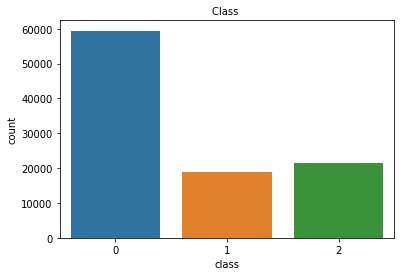

In [8]:
sns.countplot(df["class"])
plt.title("Class ",fontsize=10)
plt.show()

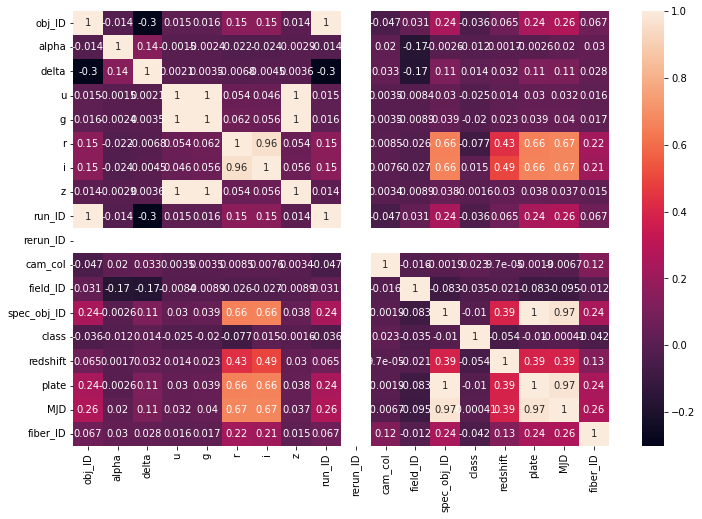

In [9]:
corr1 = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [10]:
corr = df.corr()

In [11]:
corr["class"].sort_values()

r             -0.076766
redshift      -0.054239
fiber_ID      -0.041586
run_ID        -0.036014
obj_ID        -0.036012
field_ID      -0.034833
u             -0.024645
g             -0.020066
alpha         -0.011756
spec_obj_ID   -0.010060
plate         -0.010060
z             -0.001614
MJD           -0.000405
delta          0.014452
i              0.015028
cam_col        0.023138
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [12]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

# 3. Data Modelling

In [13]:
X = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred0 = reg.predict(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred1 = lg.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)
y_pred2 = r_forest.predict(X_test)

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred3 = clf.predict(X_test) 

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred4 = gnb.predict(X_test) 

In [20]:
print("MAE for Linear Regression: " + str(mean_absolute_error(y_test, y_pred0)))
print("MAE for logistic Regression: " + str(mean_absolute_error(y_test, y_pred1)))
print("MAE for Random Forest Classifier: " + str(mean_absolute_error(y_test, y_pred2)))
print("MAE for Decsion Tree: " + str(mean_absolute_error(y_test, y_pred3)))
print("MAE for Naive Bayes: " + str(mean_absolute_error(y_test, y_pred4)))

MAE for Linear Regression: 0.7390617347722191
MAE for logistic Regression: 0.6201212121212121
MAE for Random Forest Classifier: 0.022333333333333334
MAE for Decsion Tree: 0.036454545454545455
MAE for Naive Bayes: 0.603030303030303


In [21]:
y_pred2

array([0, 2, 2, ..., 0, 2, 0])